# Analisi del dataset di Train e preprocessing dello stesso.

In [ ]:
##Caricamento del Dataset di Train ed esplorazione preliminare
#

import pandas as pd

# Carica i dataset dal repository di Github nei DataFrame
url_train = 'https://raw.githubusercontent.com/Michele9917/Calcolo_project/refs/heads/main/Corona_NLP_train.csv'
df_train = pd.read_csv(url_train, encoding='ISO-8859-1')

# Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
print(df_train.head(10))

# Stampa informazioni generali sul DataFrame
print(df_train.info())

# Statistiche descrittive delle colonne numeriche
print(df_train.describe())

# Controlla se ci sono valori nulli
print(df_train.isnull().sum())

# Visualizza il numero di valori unici in ogni colonna
print(df_train.nunique())

   UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give eld

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64
Sentiment
Positive              27.752266
Negative              24.095537
Neutral               18.740433
Extremely Positive    16.094468
Extremely Negative    13.317297
Name: proportion, dtype: float64


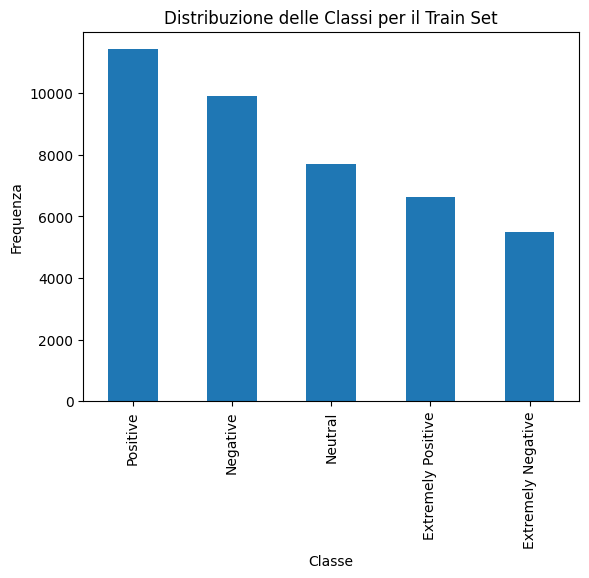

In [ ]:
##Analisi di distribuzione delle classi per il Train set
#

import matplotlib.pyplot as plt

sentiment = 'Sentiment'

# Calcola la distribuzione delle classi
class_distribution = df_train[sentiment].value_counts()

# Visualizza la distribuzione delle classi
print(class_distribution)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100

# Visualizza la percentuale della distribuzione delle classi
print(class_distribution_percentage)

# Grafico a barre della distribuzione delle classi
class_distribution.plot(kind='bar')
plt.title('Distribuzione delle Classi per il Train Set')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

Lunghezza media dei tweet per Sentiment:
Sentiment
Neutral               168.160897
Negative              203.334174
Positive              207.056558
Extremely Negative    221.479839
Extremely Positive    228.237470
Name: tweet_length, dtype: float64


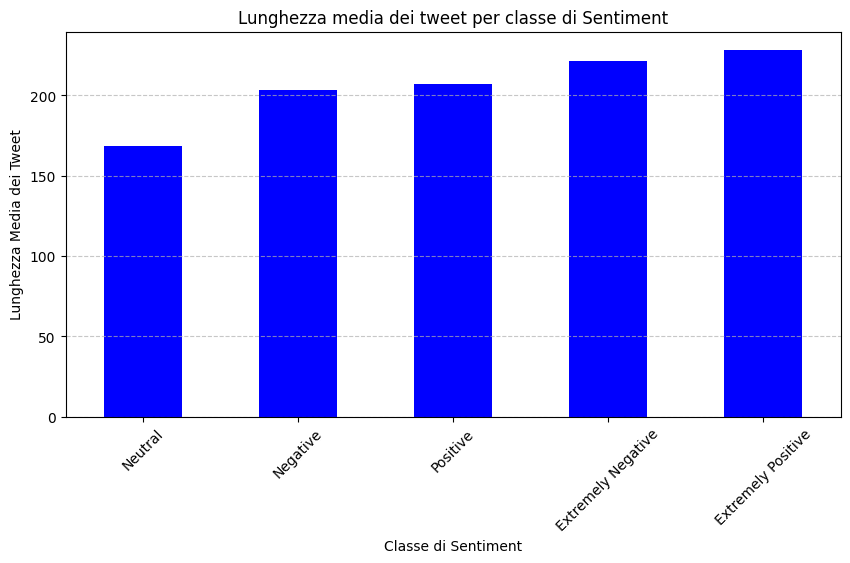

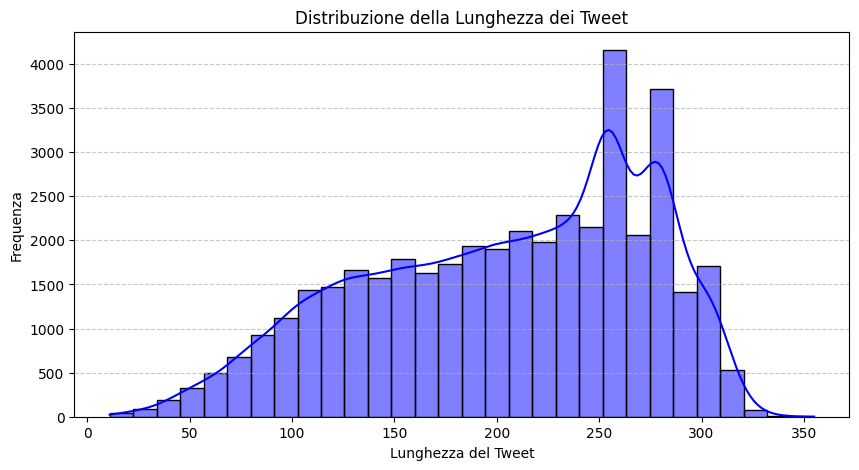

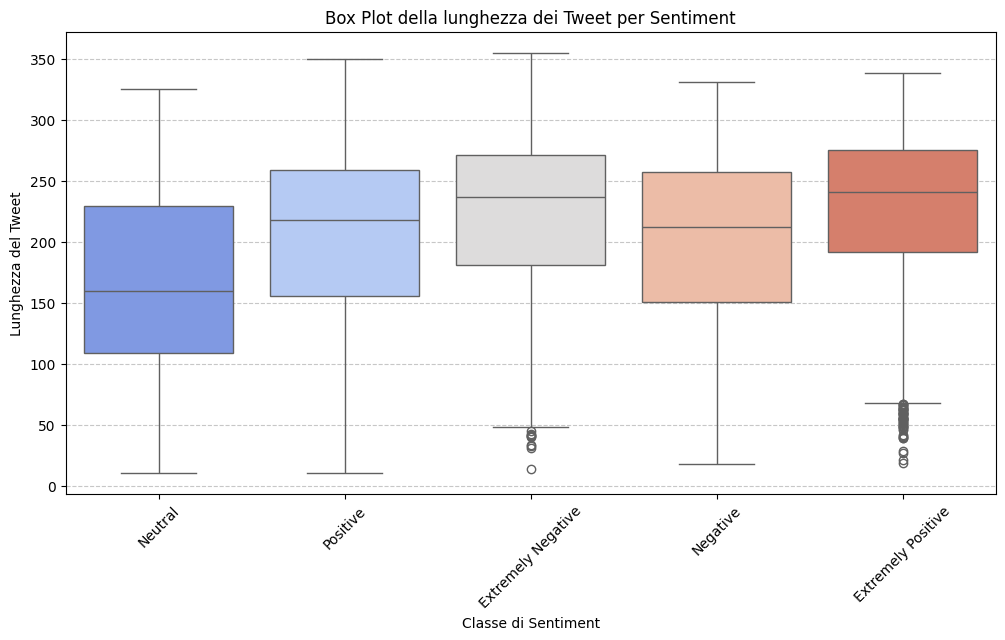

In [ ]:
## Analisi della lunghezza media dei Tweet di Train
#

import seaborn as sns

# Aggiungo la colonna con la lunghezza del tweet nel dataset di Train
df_train['tweet_length'] = df_train['OriginalTweet'].apply(len)

# Calcolo la lunghezza media dei tweet per ogni classe di Sentiment
mean_lengths = df_train.groupby('Sentiment')['tweet_length'].mean().sort_values()

# Stampa le lunghezze medie per classe
print("Lunghezza media dei tweet per Sentiment:")
print(mean_lengths)

# Visualizza un grafico a barre della lunghezza media per classe
plt.figure(figsize=(10, 5))
mean_lengths.plot(kind='bar', color='blue')
plt.xlabel("Classe di Sentiment")
plt.ylabel("Lunghezza Media dei Tweet")
plt.title("Lunghezza media dei tweet per classe di Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distribuzione della lunghezza dei tweet

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
sns.histplot(df_train['tweet_length'], bins=30, kde=True, color='blue')
plt.xlabel("Lunghezza del Tweet")
plt.ylabel("Frequenza")
plt.title("Distribuzione della Lunghezza dei Tweet")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box Plot della lunghezza dei tweet nel Train Set
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sentiment", y="tweet_length", hue="Sentiment", data=df_train, palette="coolwarm", legend=False)
plt.xlabel("Classe di Sentiment")
plt.ylabel("Lunghezza del Tweet")
plt.title("Box Plot della lunghezza dei Tweet per Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


https: 23979
coronavirus: 18045
prices: 7903
food: 7053
supermarket: 7019
store: 6818
grocery: 6239
people: 5537
amp: 5197
consumer: 4474


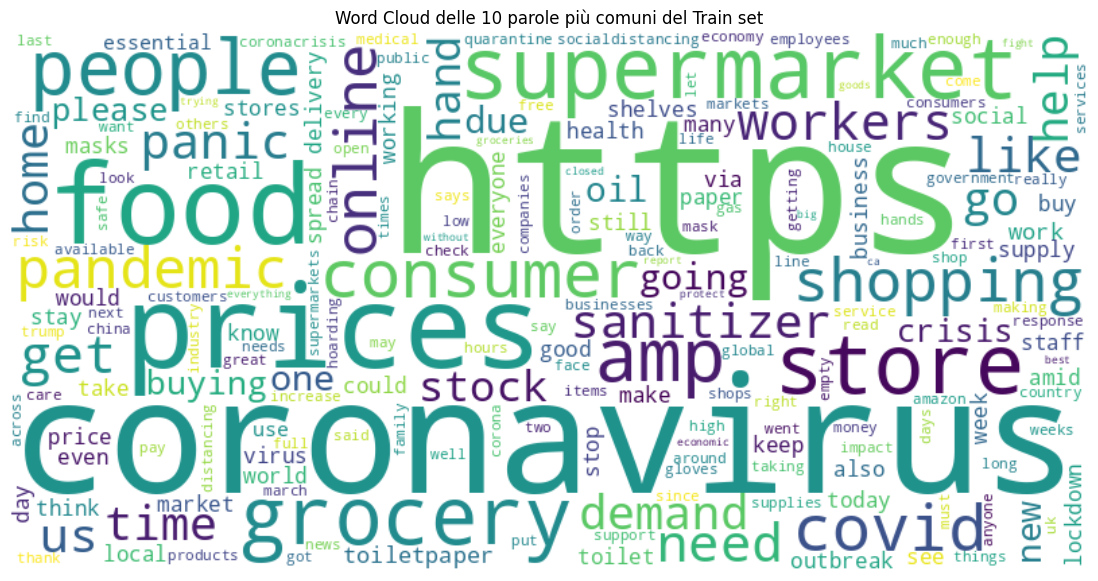

In [ ]:
##Identificazione delle 10 parole più comuni per il dataset di Train
#

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Colonna che contiene il testo nel dataset
text_column = 'OriginalTweet'
text_data = df_train[text_column]

# Combina tutto il testo in un'unica stringa
combined_text = " ".join(text for text in text_data)

# Tokenizza il testo
tokens = word_tokenize(combined_text)

# Converti tutte le parole in minuscolo per standardizzare
tokens = [word.lower() for word in tokens if word.isalpha()]

# Rimuovi le stopwords (parole comuni che possono essere escluse)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Conta e ottieni le parole più comuni
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Visualizza le 10 parole più comuni
for word, count in most_common_words:
    print(f"{word}: {count}")

#WORD CLOUD (visualizzazione più gradevole)
# Importa la libreria WordCloud
from wordcloud import WordCloud

# Crea un'istanza di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Genera la word cloud dalle frequenze delle parole
wordcloud.generate_from_frequencies(word_counts)

# Visualizza la word cloud utilizzando matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud delle 10 parole più comuni del Train set')
plt.show()

In [ ]:
##Text cleaning e feature extraction
#

from sklearn.feature_extraction.text import CountVectorizer
import re
from html import unescape
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# scaricare i componenti necessari di nltk
nltk.download('wordnet')
nltk.download('stopwords')

#Funzione di pulizia del testo
def clean_text(text):
    # Decodifica HTML
    text = unescape(text)

    # Rimuovi URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Rimuovi emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Rimuovi numeri
    text = re.sub(r'\d+', '', text)

    # Rimuovi caratteri speciali e spazi extra
    text = re.sub(r'\s+', ' ', text)  # spazi multipli a spazio singolo
    text = re.sub(r'[^\w\s]', '', text)  # rimuove caratteri speciali, mantenendo solo parole e spazi

    # Normalizzazione del testo: converti tutto in minuscolo
    text = text.lower()

    # Tokenizzazione utilizzando solo parole (rimuove la punteggiatura)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Rimuovi le stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatizzazione
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Riunisci i token puliti in una stringa
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Applica la funzione di pulizia a ciascun elemento
cleaned_text_data = text_data.apply(clean_text)

# Feature Extraction usando CountVectorizer per ottenere la frequenza delle parole
vectorizer = CountVectorizer(max_features=1000) # Considera solo le prime 1000 parole
X = vectorizer.fit_transform(cleaned_text_data)

# Visualizza le feature estratte
print(vectorizer.get_feature_names_out())

# Converti in DataFrame per un'analisi più semplice
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['able' 'absolutely' 'access' 'according' 'account' 'across' 'act'
 'action' 'activity' 'actually' 'add' 'advantage' 'advice' 'affect'
 'affected' 'afford' 'age' 'ago' 'ahead' 'aisle' 'alcohol' 'alert' 'allow'
 'allowed' 'almost' 'along' 'already' 'also' 'always' 'amazing' 'amazon'
 'america' 'american' 'amid' 'amidst' 'among' 'amount' 'amp' 'announced'
 'another' 'answer' 'anxiety' 'anyone' 'anything' 'apart' 'app'
 'appreciate' 'april' 'area' 'arent' 'around' 'article' 'asda' 'ask'
 'asked' 'asking' 'australia' 'available' 'avoid' 'away' 'baby' 'back'
 'bad' 'bag' 'bank' 'bare' 'based' 'basic' 'bc' 'become' 'beginning'
 'behavior' 'behaviour' 'behind' 'believe' 'benefit' 'best' 'better' 'big'
 'biggest' 'bill' 'billion' 'bit' 'blog' 'book' 'borisjohnson' 'bottle'
 'bought' 'box' 'brand' 'bread' 'break' 'breaking' 'bring' 'bulk' 'bus'
 'business' 'buy' 'buyer' 'buying' 'california' 'call' 'called' 'calling'
 'calm' 'came' 'canada' 'canadian' 'cannot' 'cant' 'canât' 'car' 'card'
 'care

In [ ]:
##Esplorazione preliminare del dataset di Train, analisi della distribuzione delle classi,
# e identificazione 10 parole più comuni per il dataset con testo pulito e
# features estratte
#

# Ottieni una panoramica del DataFrame con il testo pulito
print(cleaned_text_data.head())

# Ottieni informazioni generali sul DataFrame delle feature estratte (BoW)
print(X_df.info())

# Statistiche descrittive delle feature (frequenze delle parole)
print(X_df.describe())

# Analisi della distribuzione delle classi
class_counts = df_train[sentiment].value_counts()
print(class_counts)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100
print(class_distribution_percentage)

# Somma le frequenze di ogni termine nel DataFrame delle feature
word_frequencies = X_df.sum(axis=0).sort_values(ascending=False)

# Ottieni le 10 parole più comuni
top_words = word_frequencies.head(10)
print(top_words)


0                         menyrbie phil_gahan chrisitv
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please dont panic enough ...
4    ready go supermarket covid outbreak im paranoi...
Name: OriginalTweet, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Columns: 1000 entries, able to youâre
dtypes: int64(1000)
memory usage: 314.0 MB
None
               able    absolutely        access     according       account  \
count  41157.000000  41157.000000  41157.000000  41157.000000  41157.000000   
mean       0.009695      0.003110      0.007654      0.004422      0.003402   
std        0.101156      0.057401      0.090970      0.066352      0.062647   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0

count    41157.000000
mean       132.121778
std         47.899068
min          0.000000
25%         95.000000
50%        138.000000
75%        171.000000
max        263.000000
Name: tweet_length, dtype: float64
count    41157.000000
mean        17.997182
std          6.548999
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         41.000000
Name: word_count, dtype: float64


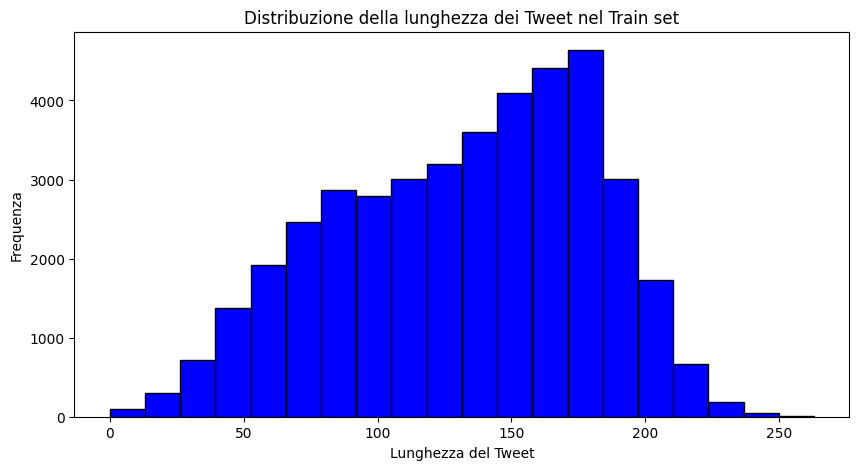

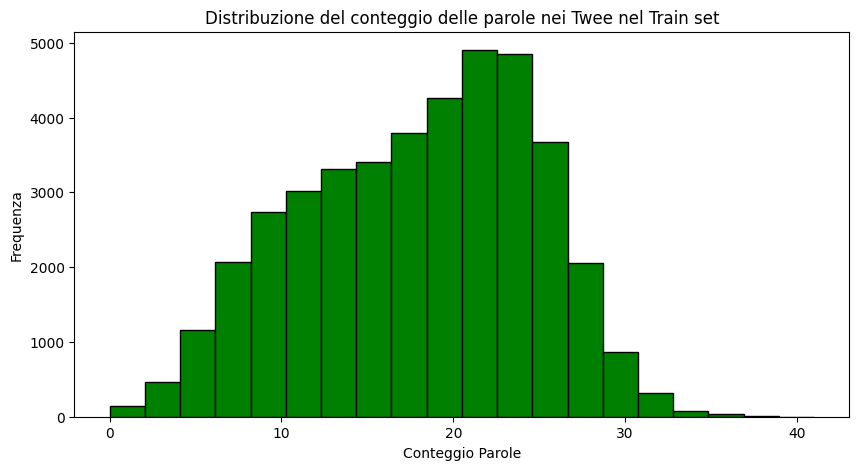

Bigrammi più comuni:
(('grocery', 'store'), 5067)
(('coronavirus', 'covid'), 2062)
(('covid', 'coronavirus'), 1760)
(('hand', 'sanitizer'), 1513)
(('online', 'shopping'), 1336)
(('toilet', 'paper'), 1230)
(('covid', 'pandemic'), 1077)
(('panic', 'buying'), 1055)
(('oil', 'price'), 1040)
(('coronavirus', 'pandemic'), 760)

Trigrammi più comuni:
(('grocery', 'store', 'worker'), 488)
(('go', 'grocery', 'store'), 302)
(('grocery', 'store', 'employee'), 278)
(('going', 'grocery', 'store'), 206)
(('local', 'grocery', 'store'), 174)
(('stop', 'panic', 'buying'), 151)
(('went', 'grocery', 'store'), 148)
(('work', 'grocery', 'store'), 127)
(('coronavirus', 'covid', 'covid'), 123)
(('food', 'supply', 'chain'), 120)


In [ ]:
##Analisi statistica dei Tweets (word level) per il dataset di Train
#
import numpy as np
from nltk import bigrams, trigrams, FreqDist

# Assumendo che 'cleaned_text_data' sia una pandas Series contenente il testo dei Tweet.
# Creiamo un nuovo DataFrame per le nostre analisi
analysis_df = pd.DataFrame()
analysis_df['tweet_text'] = cleaned_text_data
analysis_df['tweet_length'] = cleaned_text_data.apply(len)
analysis_df['word_count'] = cleaned_text_data.apply(lambda x: len(x.split()))

# Visualizza le statistiche descrittive per la lunghezza dei tweet e il conteggio delle parole
print(analysis_df['tweet_length'].describe())
print(analysis_df['word_count'].describe())

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['tweet_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuzione della lunghezza dei Tweet nel Train set')
plt.xlabel('Lunghezza del Tweet')
plt.ylabel('Frequenza')
plt.show()

# Istogramma del conteggio delle parole
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['word_count'], bins=20, color='green', edgecolor='black')
plt.title('Distribuzione del conteggio delle parole nei Twee nel Train set')
plt.xlabel('Conteggio Parole')
plt.ylabel('Frequenza')
plt.show()

# Analisi di bigrammi e trigrammi (le 10 combinazioni più comuni)
# Unisco tutti i tweet in una stringa e tokenizzo
all_words = ' '.join(cleaned_text_data).split()

# Calcola bigrammi e trigrammi
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Calcola le frequenze
bi_gram_freq = FreqDist(bi_grams).most_common(10)
tri_gram_freq = FreqDist(tri_grams).most_common(10)

print("Bigrammi più comuni:")
for item in bi_gram_freq:
    print(item)

print("\nTrigrammi più comuni:")
for item in tri_gram_freq:
    print(item)

# Analisi del dataset di Test e preprocessing dello stesso.

In [ ]:
##Caricamento del Dataset di Test ed esplorazione preliminare
#

# Carica i dataset dal repository di Github nei DataFrame
url_test = 'https://raw.githubusercontent.com/Michele9917/Calcolo_project/refs/heads/main/Corona_NLP_test.csv'
df_test = pd.read_csv(url_test, encoding='ISO-8859-1')

# Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
print(df_test.head(10))

# Stampa informazioni generali sul DataFrame
print(df_test.info())

# Statistiche descrittive delle colonne numeriche
print(df_test.describe())

# Controlla se ci sono valori nulli
print(df_test.isnull().sum())

# Visualizza il numero di valori unici in ogni colonna
print(df_test.nunique())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   
6         7       44959                  NaN  03-03-2020   
7         8       44960  Geneva, Switzerland  03-03-2020   
8         9       44961                  NaN  04-03-2020   
9        10       44962      Dublin, Ireland  04-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as 

Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64
Sentiment
Negative              27.409163
Positive              24.934176
Neutral               16.298052
Extremely Positive    15.771459
Extremely Negative    15.587151
Name: proportion, dtype: float64


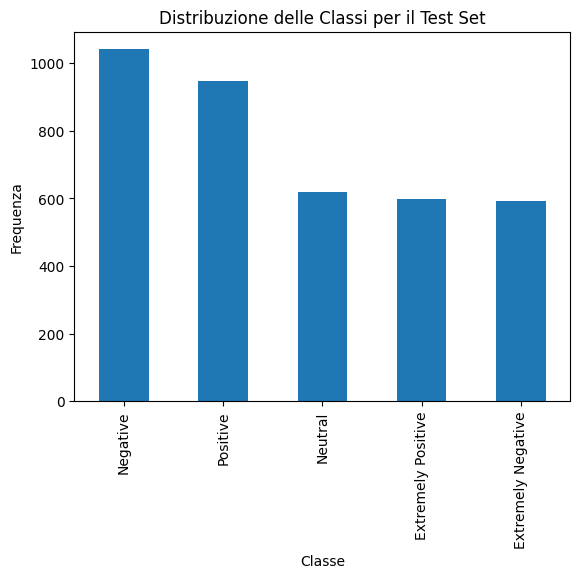

In [ ]:
##Analisi di distribuzione delle classi per il Test set
#

sentiment = 'Sentiment'

# Calcola la distribuzione delle classi
class_distribution = df_test[sentiment].value_counts()

# Visualizza la distribuzione delle classi
print(class_distribution)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_test[sentiment].value_counts(normalize=True) * 100

# Visualizza la percentuale della distribuzione delle classi
print(class_distribution_percentage)

# Grafico a barre della distribuzione delle classi
class_distribution.plot(kind='bar')
plt.title('Distribuzione delle Classi per il Test Set')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

Lunghezza media dei tweet nel Test Set per Sentiment:
Sentiment
Neutral               168.159935
Negative              213.318924
Positive              214.367476
Extremely Negative    234.673986
Extremely Positive    240.737896
Name: tweet_length, dtype: float64


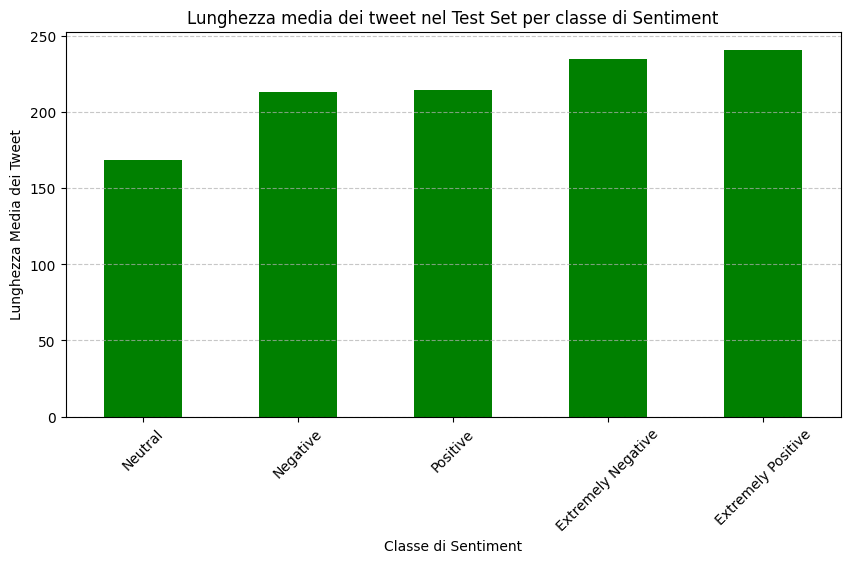

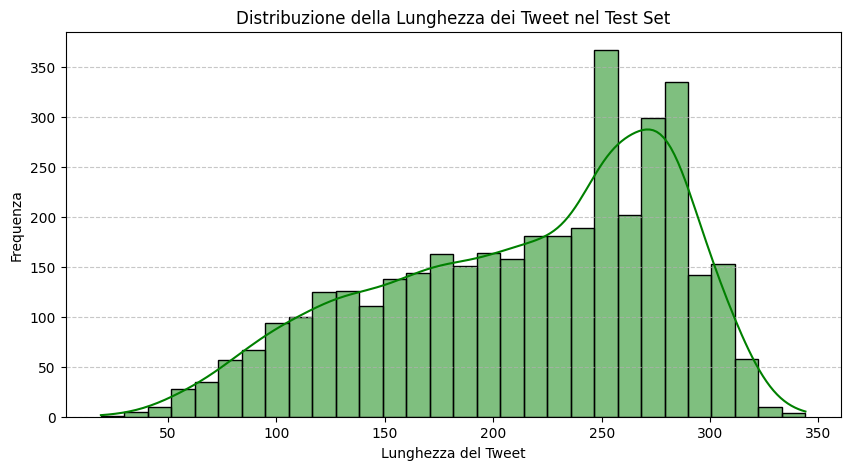

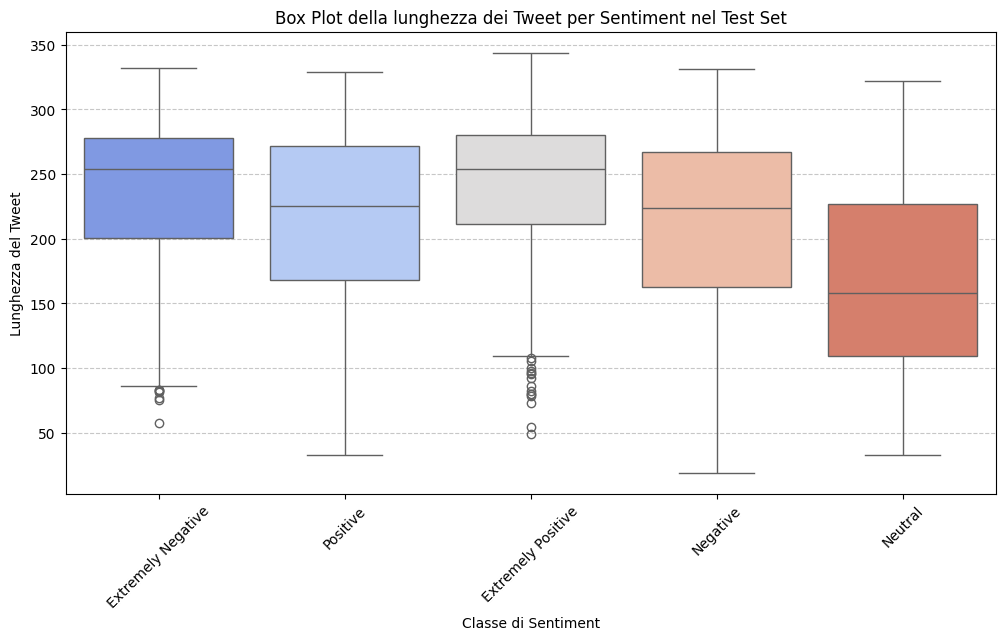

In [ ]:
## Analisi della lunghezza media dei Tweet di Test
#

# Aggiungo la colonna con la lunghezza del tweet nel dataset di Test
df_test['tweet_length'] = df_test['OriginalTweet'].apply(len)

# Calcolo la lunghezza media dei tweet per ogni classe di Sentiment
mean_lengths_test = df_test.groupby('Sentiment')['tweet_length'].mean().sort_values()

# Stampa le lunghezze medie per classe
print("Lunghezza media dei tweet nel Test Set per Sentiment:")
print(mean_lengths_test)

# Visualizza un grafico a barre della lunghezza media per classe nel Test Set
plt.figure(figsize=(10, 5))
mean_lengths_test.plot(kind='bar', color='green')
plt.xlabel("Classe di Sentiment")
plt.ylabel("Lunghezza Media dei Tweet")
plt.title("Lunghezza media dei tweet nel Test Set per classe di Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distribuzione della lunghezza dei tweet nel Test Set

# Istogramma della lunghezza dei tweet nel Test Set
plt.figure(figsize=(10, 5))
sns.histplot(df_test['tweet_length'], bins=30, kde=True, color='green')
plt.xlabel("Lunghezza del Tweet")
plt.ylabel("Frequenza")
plt.title("Distribuzione della Lunghezza dei Tweet nel Test Set")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box Plot della lunghezza dei tweet nel Test Set
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sentiment", y="tweet_length", hue="Sentiment", data=df_test, palette="coolwarm", legend=False)
plt.xlabel("Classe di Sentiment")
plt.ylabel("Lunghezza del Tweet")
plt.title("Box Plot della lunghezza dei Tweet per Sentiment nel Test Set")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


https: 1824
coronavirus: 1510
food: 1331
store: 1012
grocery: 816
people: 783
stock: 780
amp: 610
shopping: 522
supermarket: 515


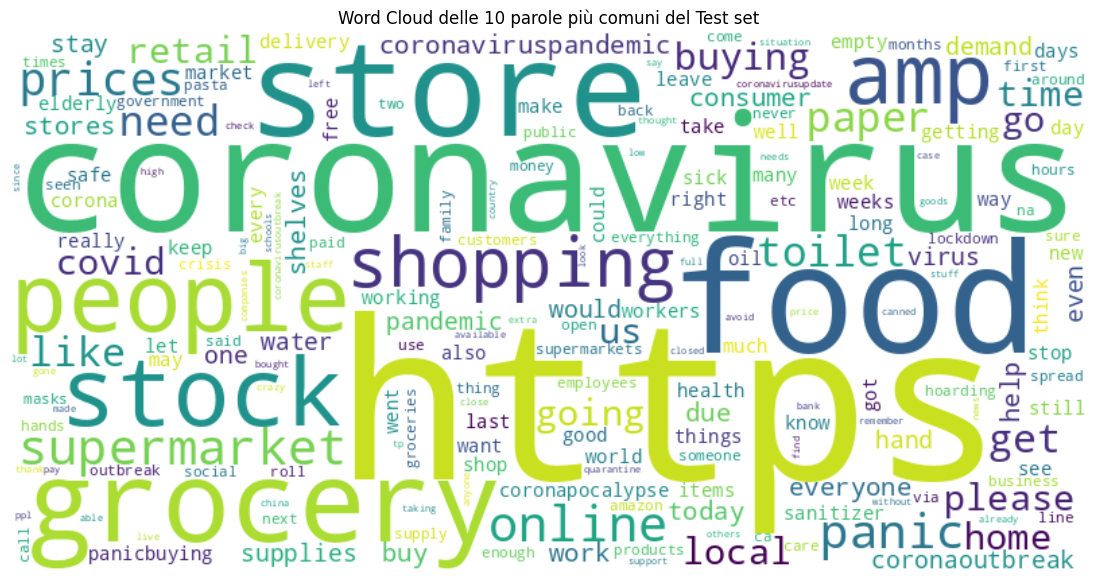

In [ ]:
##Identificazione delle 10 parole più comuni per il dataset di Test
#

# Colonna che contiene il testo nel dataset
text_column = 'OriginalTweet'
text_data_test = df_test[text_column]

# Combina tutto il testo in un'unica stringa
combined_text = " ".join(text for text in text_data_test)

# Tokenizza il testo
tokens = word_tokenize(combined_text)

# Converti tutte le parole in minuscolo per standardizzare
tokens = [word.lower() for word in tokens if word.isalpha()]

# Rimuovi le stopwords (parole comuni che possono essere escluse)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Conta e ottieni le parole più comuni
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Visualizza le 10 parole più comuni
for word, count in most_common_words:
    print(f"{word}: {count}")

#WORD CLOUD (visualizzazione più gradevole)
# Crea un'istanza di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Genera la word cloud dalle frequenze delle parole
wordcloud.generate_from_frequencies(word_counts)

# Visualizza la word cloud utilizzando matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud delle 10 parole più comuni del Test set')
plt.show()

In [ ]:
##Text cleaning e feature extraction per il Test set
#

# Applica la funzione di pulizia a ciascun elemento
cleaned_text_data_test = text_data_test.apply(clean_text)

# Bisogna utilizzare il vectorizer già adattato dai dati di training,
# perciò ci si assicura che il vectorizer sia quello adattato sopra con i dati di training
X = vectorizer.transform(cleaned_text_data_test)

# Converti in DataFrame per un'analisi più semplice
X_df_test = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
##Esplorazione preliminare del dataset di Test, analisi della distribuzione delle classi,
# e identificazione 10 parole più comuni per il dataset con testo pulito e
# features estratte
#

# Ottieni una panoramica del DataFrame con il testo pulito
print(cleaned_text_data_test.head())

# Ottieni informazioni generali sul DataFrame delle feature estratte (BoW)
print(X_df_test.info())

# Statistiche descrittive delle feature (frequenze delle parole)
print(X_df_test.describe())

# Analisi della distribuzione delle classi
class_counts = df_test[sentiment].value_counts()
print(class_counts)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_test[sentiment].value_counts(normalize=True) * 100
print(class_distribution_percentage)

# Somma le frequenze di ogni termine nel DataFrame delle feature
word_frequencies = X_df_test.sum(axis=0).sort_values(ascending=False)

# Ottieni le 10 parole più comuni
top_words = word_frequencies.head(10)
print(top_words)

0    trending new yorkers encounter empty supermark...
1    couldnt find hand sanitizer fred meyer turned ...
2                   find protect loved one coronavirus
3    panic buying hit newyork city anxious shopper ...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: OriginalTweet, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Columns: 1000 entries, able to youâre
dtypes: int64(1000)
memory usage: 29.0 MB
None
              able   absolutely       access    according      account  \
count  3798.000000  3798.000000  3798.000000  3798.000000  3798.000000   
mean      0.013955     0.003423     0.005529     0.003686     0.002633   
std       0.117318     0.058413     0.074163     0.060610     0.051252   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.0

count    3798.000000
mean      137.008952
std        46.142123
min         9.000000
25%       103.000000
50%       144.000000
75%       174.000000
max       256.000000
Name: tweet_length, dtype: float64
count    3798.000000
mean       19.119010
std         6.611221
min         2.000000
25%        14.000000
50%        20.000000
75%        24.000000
max        38.000000
Name: word_count, dtype: float64


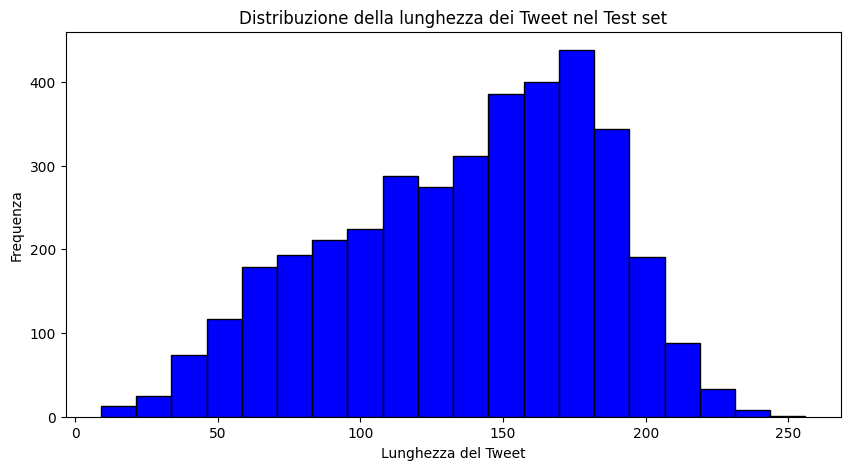

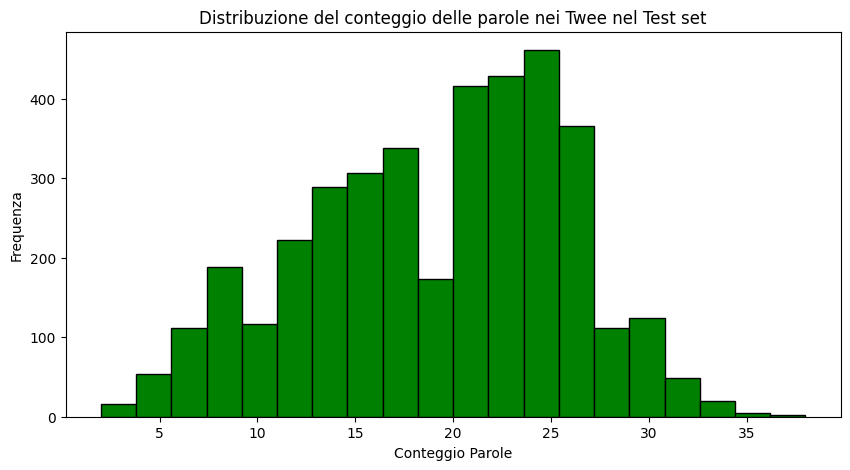

Bigrammi più comuni:
(('grocery', 'store'), 716)
(('toilet', 'paper'), 312)
(('online', 'shopping'), 224)
(('stock', 'food'), 220)
(('panic', 'buying'), 163)
(('coronavirus', 'covid'), 129)
(('covid_', 'coronavirus'), 101)
(('coronavirus', 'covid_'), 95)
(('retail', 'store'), 95)
(('covid', 'coronavirus'), 92)

Trigrammi più comuni:
(('local', 'grocery', 'store'), 59)
(('went', 'grocery', 'store'), 38)
(('go', 'grocery', 'store'), 32)
(('paid', 'sick', 'leave'), 30)
(('food', 'toilet', 'paper'), 29)
(('local', 'food', 'bank'), 26)
(('grocery', 'store', 'today'), 24)
(('grocery', 'store', 'covid_'), 23)
(('grocery', 'store', 'shelf'), 22)
(('buying', 'toilet', 'paper'), 19)


In [ ]:
##Analisi statistica dei Tweets (word level) per il dataset di Test
#

# 'cleaned_text_data_test' è una pandas Series contenente il testo dei Tweet.
# Creiamo un nuovo DataFrame per le nostre analisi
analysis_df_test = pd.DataFrame()
analysis_df_test['tweet_text'] = cleaned_text_data_test
analysis_df_test['tweet_length'] = cleaned_text_data_test.apply(len)
analysis_df_test['word_count'] = cleaned_text_data_test.apply(lambda x: len(x.split()))

# Visualizza le statistiche descrittive per la lunghezza dei tweet e il conteggio delle parole
print(analysis_df_test['tweet_length'].describe())
print(analysis_df_test['word_count'].describe())

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
plt.hist(analysis_df_test['tweet_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuzione della lunghezza dei Tweet nel Test set')
plt.xlabel('Lunghezza del Tweet')
plt.ylabel('Frequenza')
plt.show()

# Istogramma del conteggio delle parole
plt.figure(figsize=(10, 5))
plt.hist(analysis_df_test['word_count'], bins=20, color='green', edgecolor='black')
plt.title('Distribuzione del conteggio delle parole nei Twee nel Test set')
plt.xlabel('Conteggio Parole')
plt.ylabel('Frequenza')
plt.show()

# Analisi di bigrammi e trigrammi (le 10 combinazioni più comuni)
# Unisco tutti i tweet in una stringa e tokenizzo
all_words = ' '.join(cleaned_text_data_test).split()

# Calcola bigrammi e trigrammi
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Calcola le frequenze
bi_gram_freq = FreqDist(bi_grams).most_common(10)
tri_gram_freq = FreqDist(tri_grams).most_common(10)

print("Bigrammi più comuni:")
for item in bi_gram_freq:
    print(item)

print("\nTrigrammi più comuni:")
for item in tri_gram_freq:
    print(item)

# Modelli di machine learning e deep learning per la classificazione binaria del Sentiment dei Tweets.

In [ ]:
print(X_df.columns)
print(X_df_test.columns)

# Verifica che entrambi i DataFrame abbiano le stesse colonne nell'ordine esatto
assert list(X_df.columns) == list(X_df_test.columns), "Columns do not match!"

Index(['able', 'absolutely', 'access', 'according', 'account', 'across', 'act',
       'action', 'activity', 'actually',
       ...
       'worth', 'would', 'wrong', 'year', 'yes', 'yesterday', 'yet', 'youre',
       'youtube', 'youâre'],
      dtype='object', length=1000)
Index(['able', 'absolutely', 'access', 'according', 'account', 'across', 'act',
       'action', 'activity', 'actually',
       ...
       'worth', 'would', 'wrong', 'year', 'yes', 'yesterday', 'yet', 'youre',
       'youtube', 'youâre'],
      dtype='object', length=1000)


Migliori parametri per Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Training Accuracy: 0.7838
Test Accuracy: 0.7008
--- Test dell'Overfitting completato ---

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.78      1546

    accuracy                           0.79      3179
   macro avg       0.79      0.79      0.79      3179
weighted avg       0.79      0.79      0.79      3179


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1633
           1       0.70      0.71      0.70      1546

    accuracy                           0.71      3179
   macro avg       0.71      0.71      0.71      3179
weighted avg       0.71      0.71      0.71      3179


Random Forest Classification Report:

              precision    r

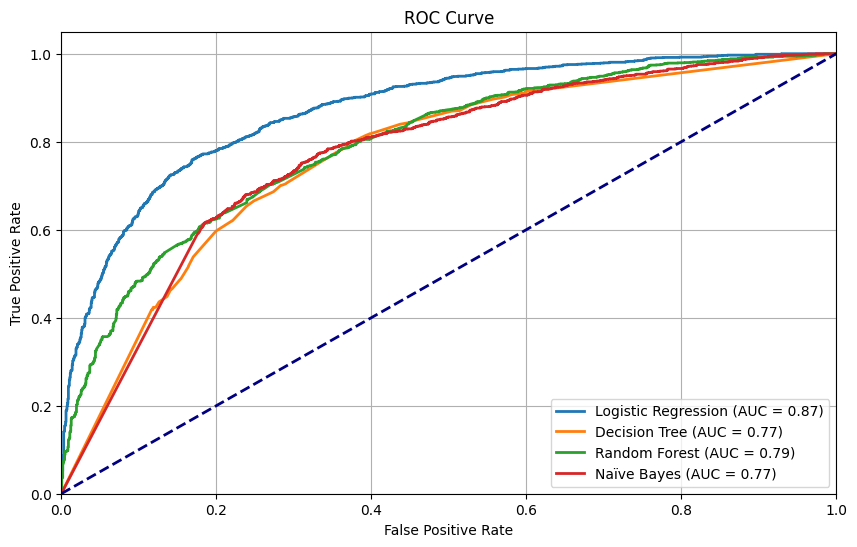

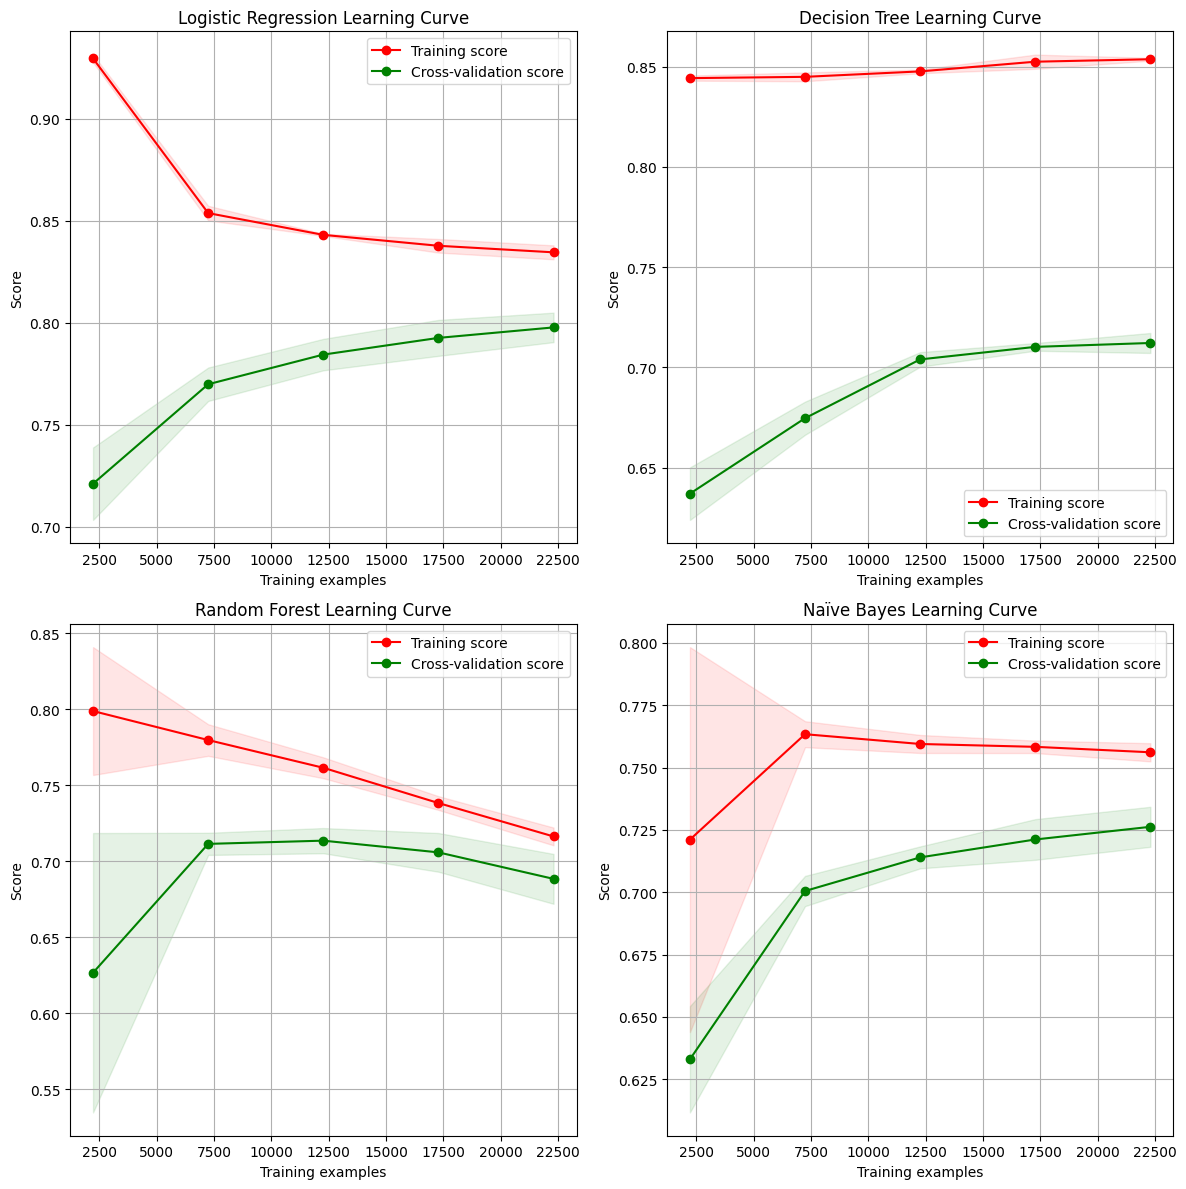

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import learning_curve, RandomizedSearchCV

# Pre-elaborazione dei dati
binary_train_df = df_train[df_train[sentiment] != 'Neutral']
binary_test_df = df_test[df_test[sentiment] != 'Neutral']

X_train = X_df.loc[binary_train_df.index]
y_train = binary_train_df[sentiment].apply(lambda x: 1 if x in ['Positive', 'Extremely Positive'] else 0)
X_test = X_df_test.loc[binary_test_df.index]
y_test = binary_test_df[sentiment].apply(lambda x: 1 if x in ['Positive', 'Extremely Positive'] else 0)

# Riduzione della dimensione per velocizzare il tuning degli iperparametri
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Ottimizzazione del Decision Tree con RandomizedSearchCV
param_dist = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_sample, y_train_sample)

best_tree = random_search.best_estimator_
print("Migliori parametri per Decision Tree:", random_search.best_params_)

# Definizione dei modelli
logreg = LogisticRegression(solver='liblinear', random_state=42)
forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
nb = GaussianNB()

models = {
    'Logistic Regression': logreg,
    'Decision Tree': best_tree,
    'Random Forest': forest,
    'Naïve Bayes': nb
}

# Test dell'Overfitting
train_acc = accuracy_score(y_train, best_tree.predict(X_train))
test_acc = accuracy_score(y_test, best_tree.predict(X_test))
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("--- Test dell'Overfitting completato ---")

# Addestramento e valutazione dei modelli
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Modello': name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2)
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

df_results = pd.DataFrame(results)
print("\n--- Riepilogo Metriche ---\n")
print(df_results)

# Visualizzazione della Matrice di Confusione per Logistic Regression
cm = confusion_matrix(y_test, logreg.predict(X_test))
print('Confusion Matrix for Logistic Regression:\n', cm)

# Visualizzazione delle Curve ROC per tutti i modelli
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generazione delle Learning Curves per ogni modello
plt.figure(figsize=(12, 12))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=3,
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1, random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='red', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()

plt.tight_layout()
plt.show()


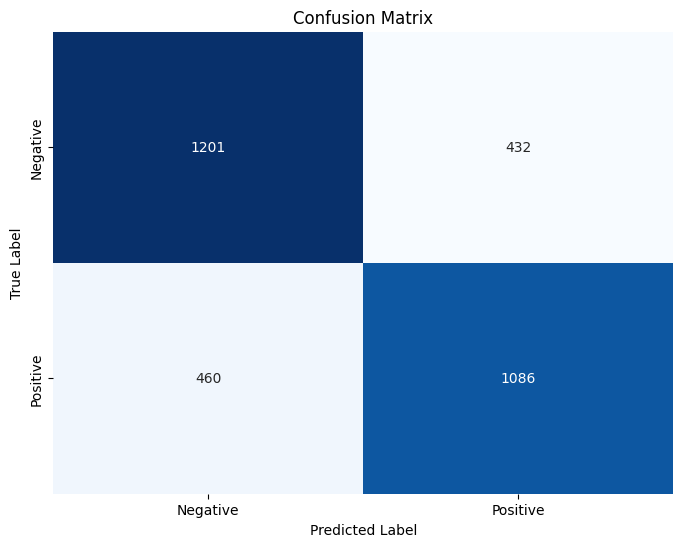

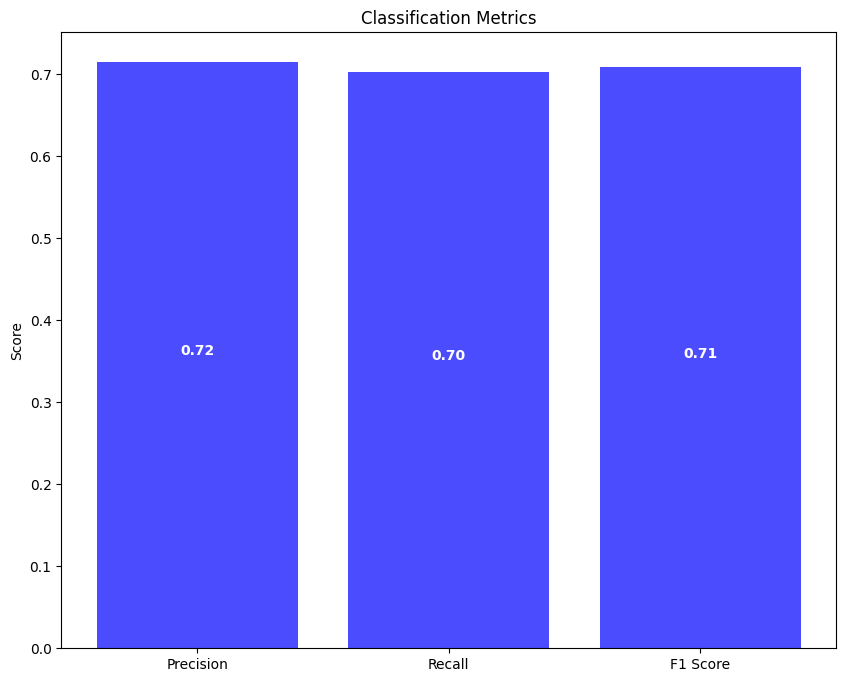

In [ ]:
##Heatmap per la matrice di confusione e un grafico a barre per precision, recall e F1-score
#


from sklearn.metrics import classification_report, precision_recall_fscore_support
import numpy as np

# Matrice di confusione grafica
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

# Calcolo della matrice di confusione e visualizzazione
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

# Calcolo delle metriche
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Bar chart per precision, recall e F1-score
metrics = [precision, recall, f1_score]
metric_names = ['Precision', 'Recall', 'F1 Score']
y_pos = np.arange(len(metrics))

plt.figure(figsize=(10, 8))
plt.bar(y_pos, metrics, alpha=0.7, color='blue')
plt.xticks(y_pos, metric_names)
plt.ylabel('Score')
plt.title('Classification Metrics')

for i in range(len(metric_names)):
    plt.text(i, metrics[i] / 2, f'{metrics[i]:.2f}', ha='center', color='white', fontweight='bold')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6009 - loss: 0.6463 - val_accuracy: 0.7917 - val_loss: 0.4529
Epoch 2/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7810 - loss: 0.4709 - val_accuracy: 0.8064 - val_loss: 0.4202
Epoch 3/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8176 - loss: 0.4122 - val_accuracy: 0.8112 - val_loss: 0.4102
Epoch 4/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8309 - loss: 0.3965 - val_accuracy: 0.8058 - val_loss: 0.4128
Epoch 5/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3727 - val_accuracy: 0.8107 - val_loss: 0.4180
Epoch 6/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8548 - loss: 0.3539 - val_accuracy: 0.8083 - val_loss: 0.4246
Epoch 7/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.3285 - val_accuracy: 0.8068 - val_loss: 0.4323
Epoch 8/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8732 - loss: 0.3131 - val_accu

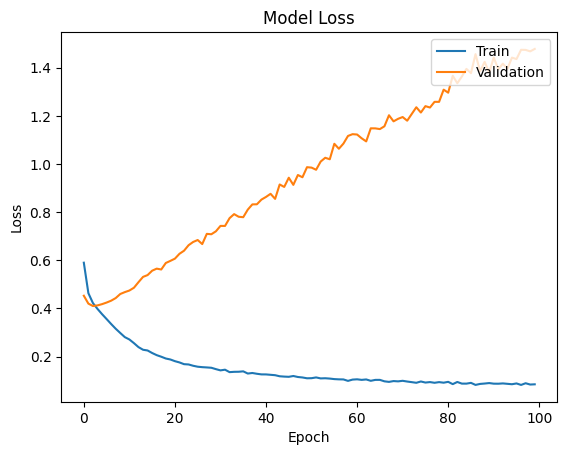

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


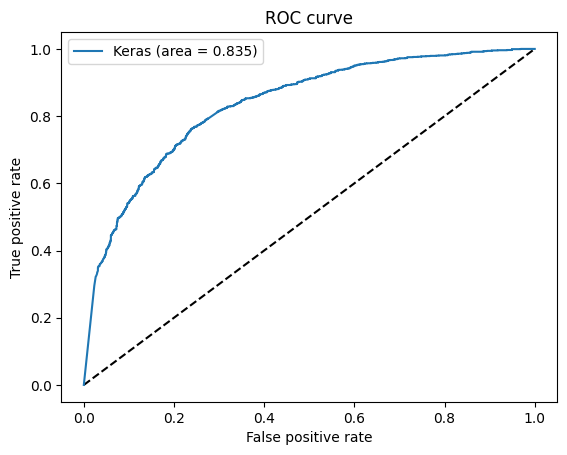

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Convert pandas DataFrame/Series to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Definizione del modello
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compila il modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Addestramento del modello
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)

# Valutazione del modello
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Deep Learning Model Accuracy: {accuracy}')

# Visualizzazione della Loss durante l'allenamento
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predizioni per la ROC Curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

# Calcolo dell'area sotto la curva ROC
auc_keras = auc(fpr_keras, tpr_keras)

# Visualizzazione della ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report for TF-IDF + Keras:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1633
           1       0.73      0.79      0.76      1546

    accuracy                           0.76      3179
   macro avg       0.76      0.76      0.76      3179
weighted avg       0.76      0.76      0.76      3179



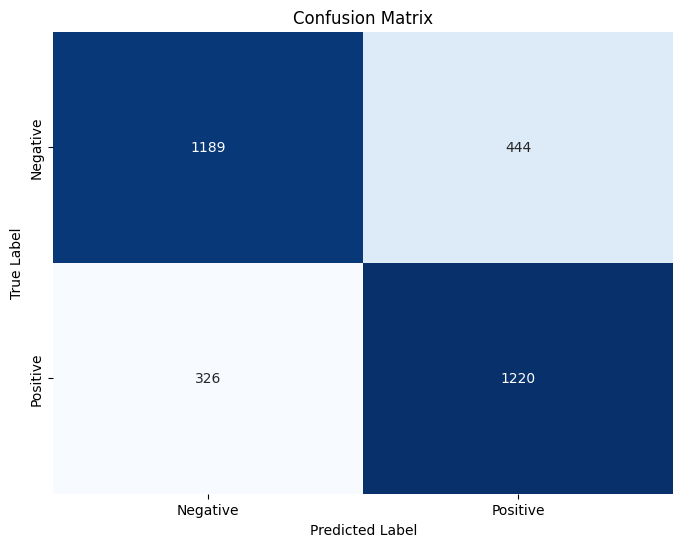

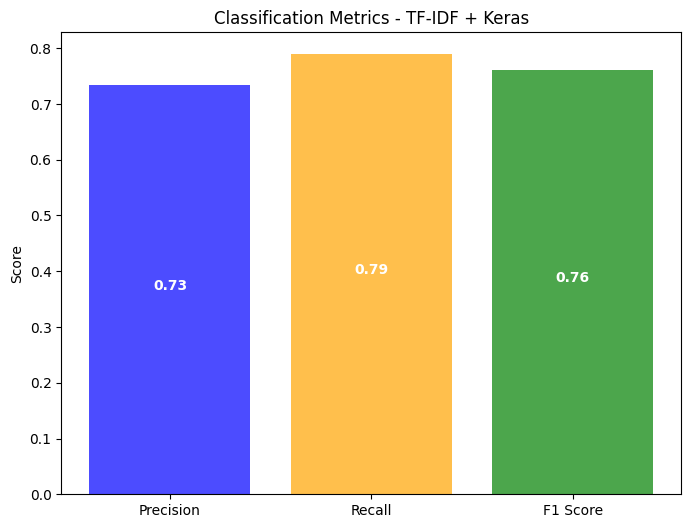

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Matrice di confusione grafica
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

# Calcolo della matrice di confusione e visualizzazione
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

# Calcolo delle Metriche di Valutazione**
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Stampa del Classification Report
print("\nClassification Report for TF-IDF + Keras:")
print(classification_report(y_test, y_pred))

# Grafico a barre delle metriche
metrics = [precision, recall, f1_score]
metric_names = ['Precision', 'Recall', 'F1 Score']
y_pos = np.arange(len(metrics))

plt.figure(figsize=(8, 6))
plt.bar(y_pos, metrics, alpha=0.7, color=['blue', 'orange', 'green'])
plt.xticks(y_pos, metric_names)
plt.ylabel('Score')
plt.title('Classification Metrics - TF-IDF + Keras')

# Annotazioni sui valori nel grafico
for i in range(len(metric_names)):
    plt.text(i, metrics[i] / 2, f'{metrics[i]:.2f}', ha='center', color='white', fontweight='bold')

plt.show()


Epoch 1/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 67s 287ms/step - accuracy: 0.3101 - loss: 0.5638 - val_accuracy: 0.4114 - val_loss: 0.4972 - learning_rate: 0.0010
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 61s 299ms/step - accuracy: 0.4101 - loss: 0.4664 - val_accuracy: 0.4471 - val_loss: 0.4372 - learning_rate: 0.0010
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 77s 275ms/step - accuracy: 0.4457 - loss: 0.4392 - val_accuracy: 0.4700 - val_loss: 0.4223 - learning_rate: 0.0010
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 87s 300ms/step - accuracy: 0.4620 - loss: 0.4244 - val_accuracy: 0.4814 - val_loss: 0.4077 - learning_rate: 0.0010
Epoch 5/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 77s 275ms/step - accuracy: 0.4813 - loss: 0.4110 - val_accuracy: 0.4749 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 6/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 274ms/step - accuracy: 0.4940 - loss: 0.4008 - val_accuracy: 0.4952 - val_loss: 0.3964 - learning_rate: 0.0010
Epoch 7/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accura

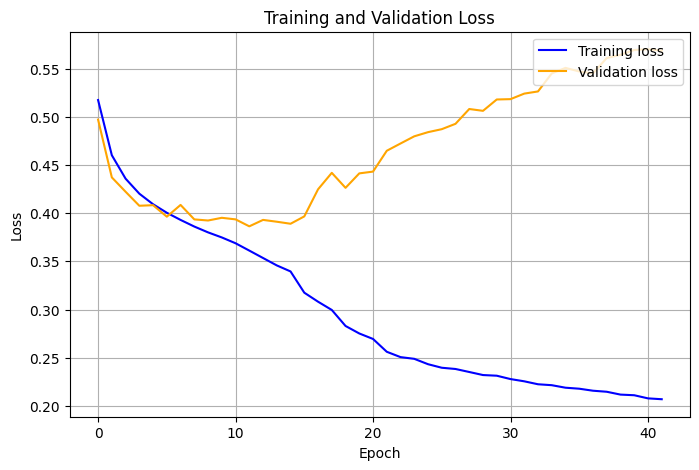

258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step


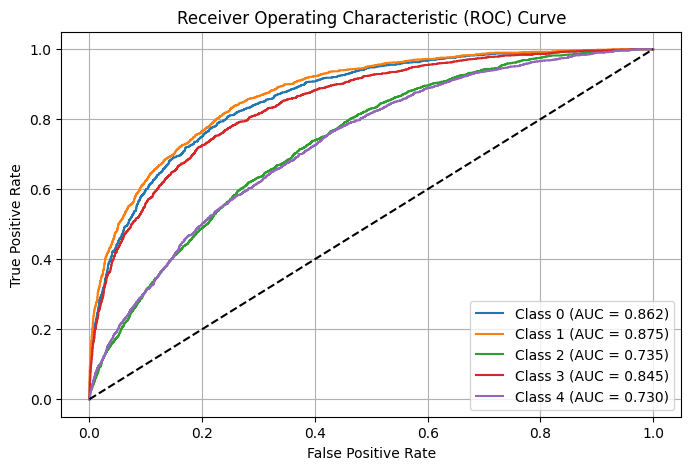

In [ ]:
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# PARAMETRI OTTIMIZZATI
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = 300
MIN_COUNT_W2V = 10  # Mantiene un vocabolario ampio

# Preprocessing del testo
df_train['processed_text'] = df_train['OriginalTweet'].apply(clean_text)
df_train['tokenized_text'] = df_train['processed_text'].apply(lambda x: x.split())

# Word2Vec ottimizzato
w2v_model = Word2Vec(
    sentences=df_train['tokenized_text'],
    vector_size=EMBEDDING_DIM,
    window=5,
    min_count=MIN_COUNT_W2V,
    workers=4
)

# Tokenizer di Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['processed_text'])
sequences = tokenizer.texts_to_sequences(df_train['processed_text'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Matrice di embedding da Word2Vec
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Preprocessing delle etichette
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['Sentiment'])
y_bin = label_binarize(y, classes=np.unique(y))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Modello LSTM ottimizzato
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(LSTM(128, return_sequences=True))  # Più unità per catturare più pattern
model.add(Dropout(0.3))  # Dropout ridotto per mantenere più informazioni
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())  # Normalizzazione per stabilizzare i pesi
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))  # Livello denso intermedio per migliore separabilità
model.add(Dropout(0.3))
model.add(Dense(y_bin.shape[1], activation='sigmoid'))  # Output layer

# Ottimizzazione con Scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training del modello
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=1, callbacks=[early_stopping, reduce_lr])

# Valutazione del modello
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Grafico della funzione di Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Calcolo della curva ROC
y_pred_proba = model.predict(X_test)

plt.figure(figsize=(8, 5))
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

ATTENZIONE: Possibile overfitting! La validation loss sta aumentando.


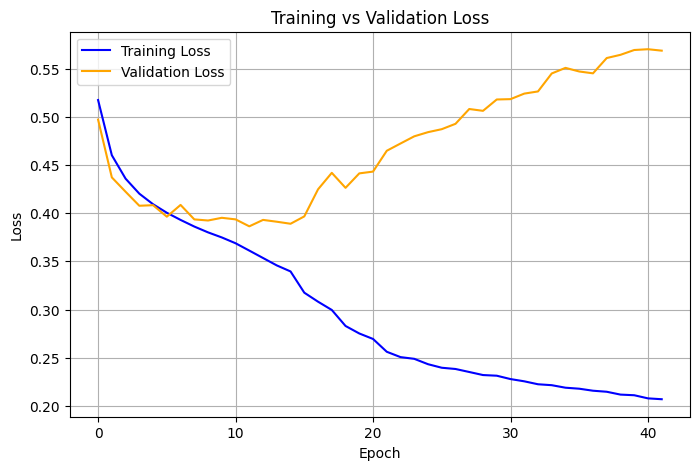

In [ ]:
import matplotlib.pyplot as plt

# Funzione per verificare l'overfitting
def check_overfitting(history):
    plt.figure(figsize=(8, 5))

    # Plot della Loss
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Verifica del comportamento della Validation Loss
    if history.history['val_loss'][-1] > history.history['val_loss'][0]:
        print("ATTENZIONE: Possibile overfitting! La validation loss sta aumentando.")
    else:
        print("Nessun segnale evidente di overfitting.")

    plt.show()

# Chiamata della funzione dopo l'addestramento
check_overfitting(history)

258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step


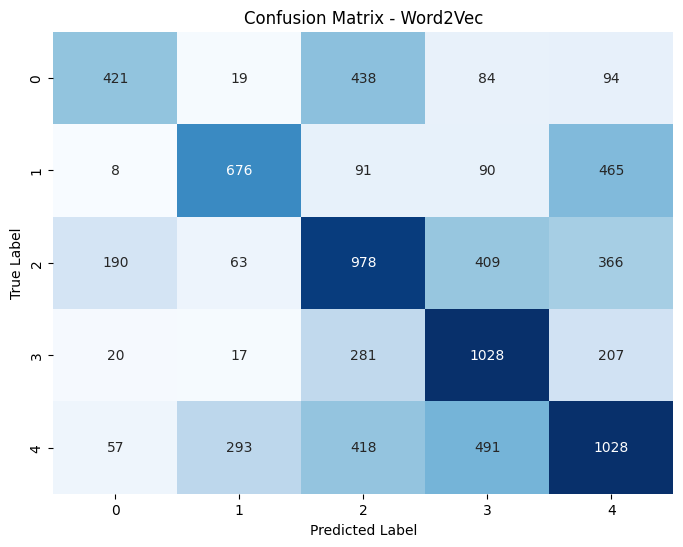


Classification Report for Word2Vec + LSTM:
              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1056
           1       0.63      0.51      0.56      1330
           2       0.44      0.49      0.46      2006
           3       0.49      0.66      0.56      1553
           4       0.48      0.45      0.46      2287

    accuracy                           0.50      8232
   macro avg       0.53      0.50      0.51      8232
weighted avg       0.51      0.50      0.50      8232



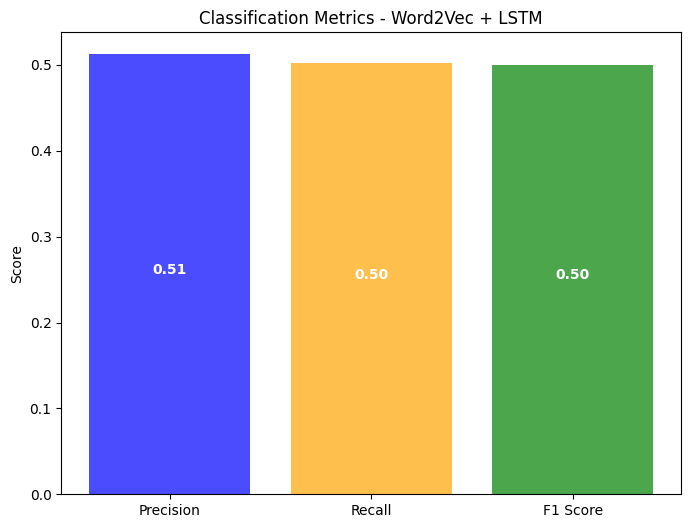

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Generazione delle predizioni
y_pred_w2v = model.predict(X_test)  # Predizioni del modello LSTM con Word2Vec
y_pred_w2v = np.argmax(y_pred_w2v, axis=1)  # Convertiamo le probabilità in etichette

# Conversione delle etichette vere
y_true = np.argmax(y_test, axis=1)  # Se y_test è one-hot encoded, lo convertiamo in un vettore 1D

# Matrice di Confusione
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_true, y_pred_w2v, "Word2Vec")

# Calcolo delle metriche di valutazione
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_w2v, average='weighted')

# Stampa dei risultati
print("\nClassification Report for Word2Vec + LSTM:")
print(classification_report(y_true, y_pred_w2v))

# Grafico a barre delle metriche
metrics = [precision, recall, f1_score]
metric_names = ['Precision', 'Recall', 'F1 Score']
y_pos = np.arange(len(metrics))

plt.figure(figsize=(8, 6))
plt.bar(y_pos, metrics, alpha=0.7, color=['blue', 'orange', 'green'])
plt.xticks(y_pos, metric_names)
plt.ylabel('Score')
plt.title('Classification Metrics - Word2Vec + LSTM')

for i in range(len(metric_names)):
    plt.text(i, metrics[i] / 2, f'{metrics[i]:.2f}', ha='center', color='white', fontweight='bold')

plt.show()